In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cls
import seaborn as sns

# Import Data Hasil Transformasi 

In [2]:
df = pd.read_excel('hasilPerc3.xlsx')

In [3]:
df

,kd_menu,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,total
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,3,1,1,1,1,1,0,0,0,0,...,1,2,1,1,1,1,1,1,1,225
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,22
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,9,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,51
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


# df1 = data tanpa kd_menu dan total

In [4]:
df1 = df.drop(['kd_menu','total'], axis=1)

In [5]:
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,269,270,271,272,273,274,275,276,277,278
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,1,...,1,1,2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Proses Elbow (Menentukan Jumlah Cluster)

In [6]:
jarak = []
K = range (1,11)
for k in K:
    km = cls.KMeans(n_clusters=k)
    km.fit(df1)
    jarak.append(km.inertia_)

In [7]:
jarak

[413.63636363636346,
 184.09999999999997,
 85.71428571428571,
 45.71428571428571,
 27.714285714285708,
 17.833333333333332,
 9.75,
 4.5,
 2.0,
 0.0]

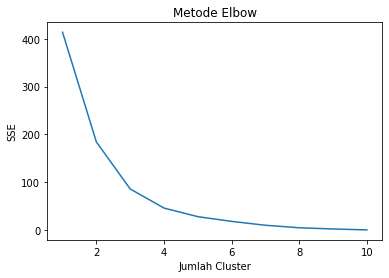

In [8]:
plt.plot(K, jarak)
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow')
plt.show()

In [9]:
conda install -c conda-forge kneed

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tita\anaconda3

  added / updated specs:
    - kneed


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



In [10]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tita\anaconda3

  added / updated specs:
    - conda


The following packages will be REMOVED:

  python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.3-py38haa244f~ --> pkgs/main::conda-4.10.3-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [11]:
from kneed import KneeLocator

# Lihat Jumlah Cluster

In [12]:
kl = KneeLocator(K, jarak, curve="convex", direction="decreasing")
kl.elbow

3

In [13]:
# nilai min untuk c1
index_min = df['total'].idxmin()
index_min

4

# centroid 1 pake index min

In [14]:
c1 = df1.iloc[[index_min]].values
c1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

# centroid 2 pake index mean

In [15]:
# nilai mean untuk c2
mean_cek = df['total'].mean()
int_mean = int(mean_cek)
print(int_mean)

30


In [16]:
c2 = df1.iloc[[3]].values
c2

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

# centroid 2 pake index median

In [17]:
# PENENTUAN C2, APABILA MENGGUNAKAN MEDIAN, (pilih salah satu)
median_cek = np.median(df['total'])
int_median = int(median_cek)
int_median

4

In [18]:
idx_median = df.index[df['total'] == int_median][0]
idx_median

1

In [19]:
c2a = df1.iloc[[idx_median]].values
c2a

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

# centroid 3 pake index max

In [20]:
# nilai maks untuk c3
index_max = df['total'].idxmax()
index_max

2

In [21]:
c3 = df1.iloc[[index_max]].values
c3

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 2, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [22]:
# gabungkan c1, c2 dan c3
nilai_centroid_awal = np.concatenate((c1, c2, c3), axis=0)
nilai_centroid_awal

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0,

# Proses K-Means

In [23]:
X = np.array(nilai_centroid_awal, np.float64)
# print(X)
km = cls.KMeans(n_clusters=3, init=X).fit(df1)
centers = km.cluster_centers_
print(centers)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.57142857e+00 0.00000000e+00
  0.00000000e+00 1.42857143e-01 0.00000000e+00 1.42857143e-01
  0.00000000e+00 2.85714286e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.42857143e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.42857143e-01 2.85714286e-01 0.00000000e+00
  1.42857143e-01 0.00000000e+00 2.85714286e-01 1.42857143e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

C:\Users\Tita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


# Mengetahui Jumlah Iterasi

In [24]:
km.n_iter_

2

# Label dan Hasil

In [25]:
# masukan nilai cluster ke dalam dataframe
df['cluster'] = km.labels_
# Code
a = km.labels_
a
mapping = {0:'Jarang diakses ', 1:'Diakses', 2:'Sering diakses'}
a = [mapping[i] for i in a]
df['keterangan'] = a

In [26]:
new_df = df[['kd_menu', 'cluster', 'keterangan']]
new_df

,kd_menu,cluster,keterangan
0,1,0,Jarang diakses
1,2,0,Jarang diakses
2,3,2,Sering diakses
3,4,1,Diakses
4,5,0,Jarang diakses
5,6,0,Jarang diakses
6,7,0,Jarang diakses
7,8,0,Jarang diakses
8,9,1,Diakses
9,10,0,Jarang diakses


# Visualisasi Hasil Cluster

(array([7., 0., 0., 0., 0., 3., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

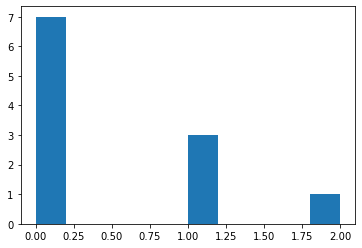

In [27]:
plt.hist(df['cluster'])

# Evaluasi DBI

In [28]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df1, km.labels_)

0.6871079058424997

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(df1, km.labels_)

0.42898536622753247